# STEP #1: IMPORT LIBRARIES AND DATASET

In [111]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [112]:
# Alternatively, you can use the same dataset made readily available by keras Using the following lines of code:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


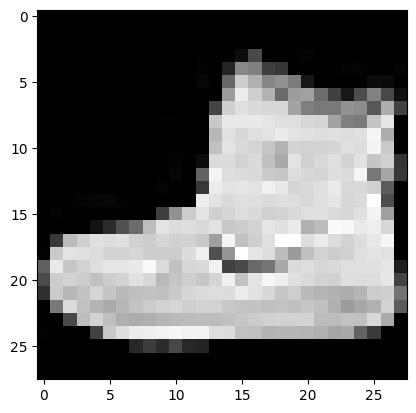

In [113]:
plt.imshow(X_train[0], cmap="gray")

In [114]:
X_train.shape

(60000, 28, 28)

In [115]:
X_test.shape

(10000, 28, 28)

# STEP #2: PERFORM DATA VISUALIZATION

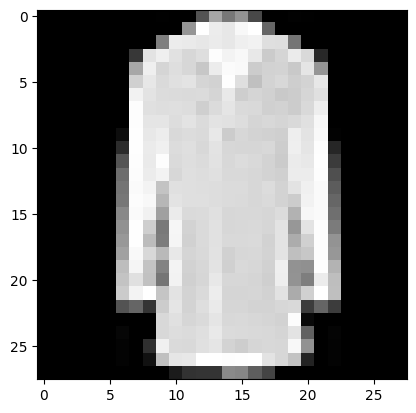

In [116]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [117]:
label = y_train[i]
label


np.uint8(4)

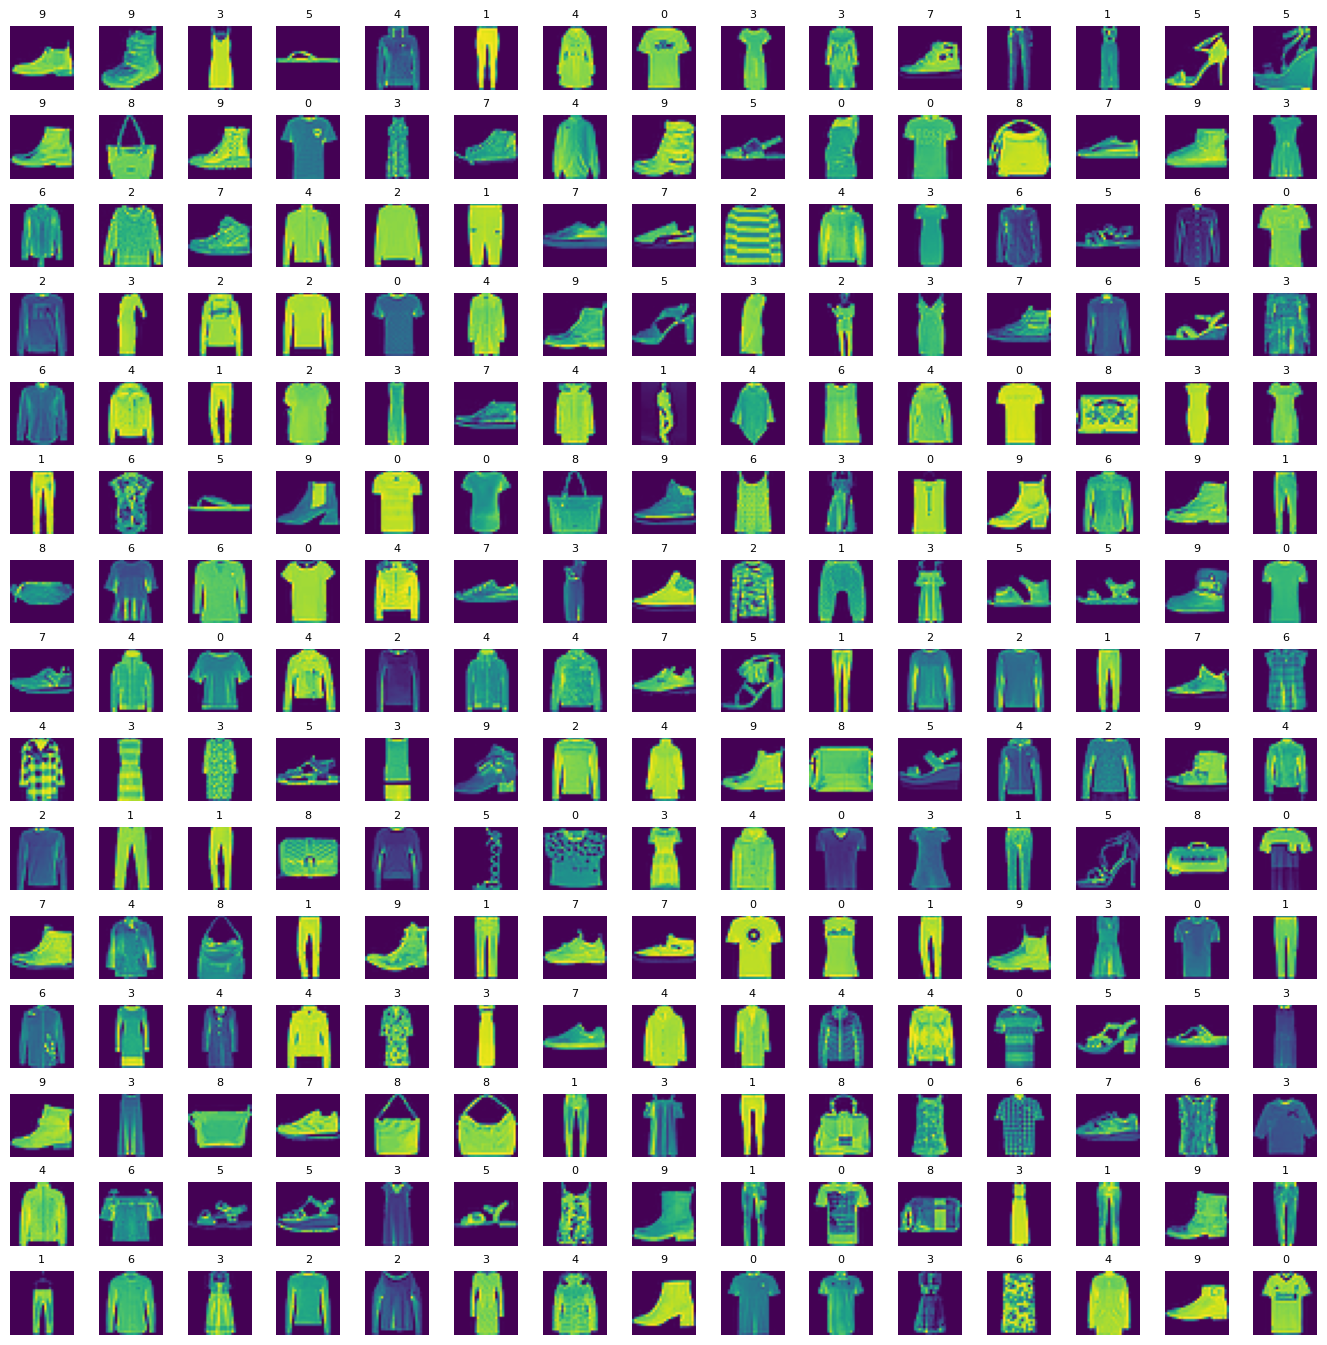

In [118]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #3: PERFORM DATA PREPROCESSING

In [119]:
X_train = X_train / 255
X_test = X_test / 255

In [120]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [121]:
noise_dataset = np.array(noise_dataset)

In [122]:
noise_dataset.shape

(60000, 28, 28)

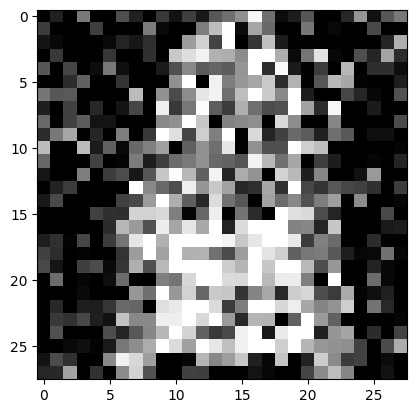

In [123]:
plt.imshow(noise_dataset[22], cmap="gray")

In [124]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)

noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

# STEP #4: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [125]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


In [127]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


In [128]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs=10,
                batch_size=200,
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4944 - val_loss: 0.3321
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3240 - val_loss: 0.3175
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3138 - val_loss: 0.3125
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3099 - val_loss: 0.3093
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3064 - val_loss: 0.3073
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3050 - val_loss: 0.3066
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3041 - val_loss: 0.3053
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3028 - val_loss: 0.3046
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3022 - val_loss: 0.3040
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3022 - val_loss: 0.3035


# STEP #5: EVALUATE TRAINED MODEL PERFORMANCE

In [129]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3034
Test Accuracy : 0.303


In [130]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [131]:
predicted.shape

(10, 28, 28, 1)

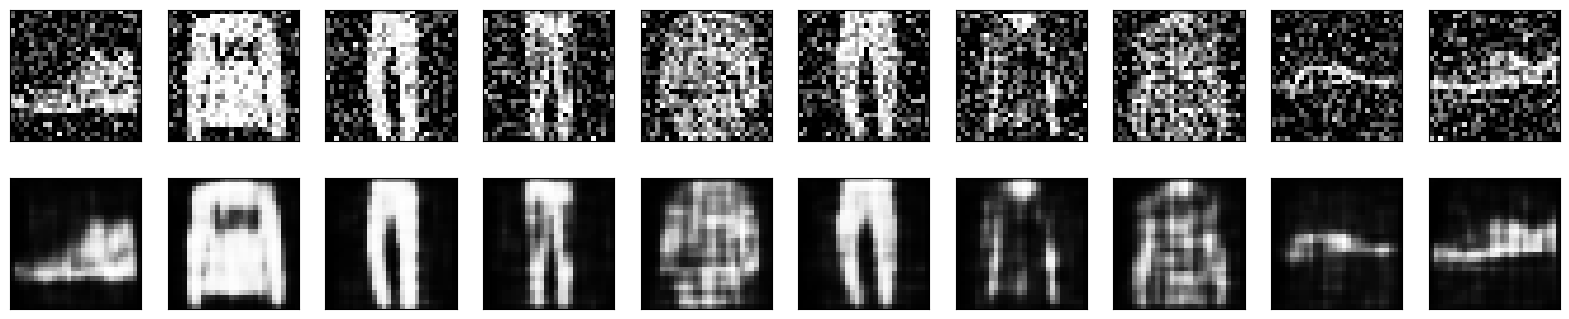

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

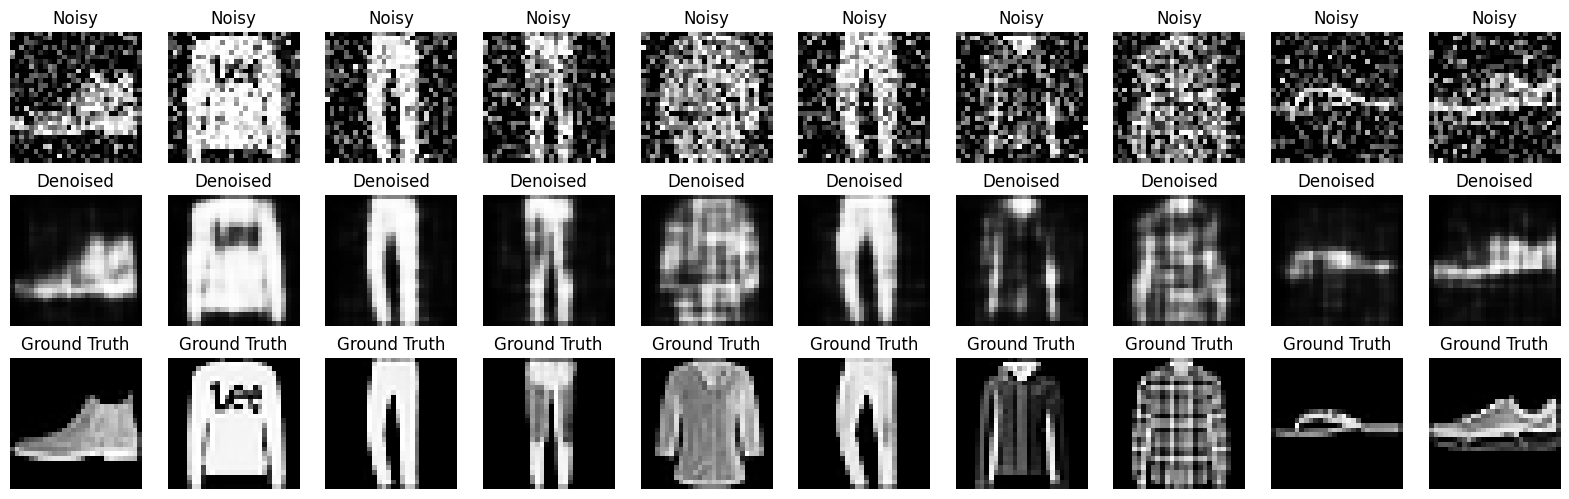

In [133]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(noise_test_set[i].reshape(28, 28), cmap="Greys_r")  # input yang ada noise
    plt.title("Noisy")
    plt.axis("off")

    # denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(predicted[i].reshape(28, 28), cmap="Greys_r")  # hasil rekonstruksi denoised
    plt.title("Denoised")
    plt.axis("off")

    # ground truth
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test[i].reshape(28, 28), cmap="Greys_r")  # gambar asli tanpa noise
    plt.title("Ground Truth")
    plt.axis("off")

plt.show()
